# ML QUICK RECAP

<img src="data/images/ml-learning.png" style="width:300px;">
 
__Machine Learning systems can be classified according to the amount and type of supervision they get during training:__ 

- Supervised learning 
- Unsupervised learning
- Semi-supervised learning
- Reinforcement learning


__There are 2 sub-categories of supervised learning:__
- Classification
- Regression



## Boston Housing Dataset Analysis (BHDA)

- this is one of the most famous analysis datasets that is often used to teach Machine Learning

- BHDA is  a **real-life example** with **basic principles** of a **popular algorithm**.


<img src="data/images/bh.png" style="width:700px;">



<div class="alert alert-block alert-info">
<b>The Boston Housing Dataset is derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. </b> 
</div>

__The following describes the dataset columns:__

- **CRIM**: Per capita crime rate by town
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft
- **INDUS**: Proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**: Nitric oxide concentration (parts per 10 million)
- **RM**: Average number of rooms per dwelling
- **AGE**: Proportion of owner-occupied units built prior to 1940
- **DIS**: Weighted distances to five Boston employment centers
- **RAD**: Index of accessibility to radial highways
- **TAX**: Full-value property tax rate per 10,000 dollars
- **PTRATIO**: Pupil-teacher ratio by town
- **B**: $1000(Bk — 0.63)²$, where Bk is the proportion of people of African American descent by town
- **LSTAT**: Percentage of lower status of the population
- **MEDV**: Median value of owner-occupied homes in $1000s

## IMPORTANT NOTES

- In supervised learning, the training data you feed the algorithm includes the desired solutions, called **labels**.
- In maths language, there is a corresponding **y** (solution) to every data point **x**.
- Supervised learning is to learn how to best represent **y** in terms of **x**.

<div class="alert alert-block alert-info">
In data science language, we usally call <b>y our target variable, and x our feature</b> 
</div>


### CASE 1 : We want to use some of the dataset features to predict MEDV.


In [1]:
# let's load libraries that we need

# NOTE: Seaborn is a Python data visualization library based on matplotlib (advanced visualization available).

import pandas as pd
import seaborn as sns # new library 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load data

df = pd.read_csv("data/BostonHousing.csv", sep = ",")

In [4]:
df.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
# examine data and perform a very simple explanatory anaylis 

df.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


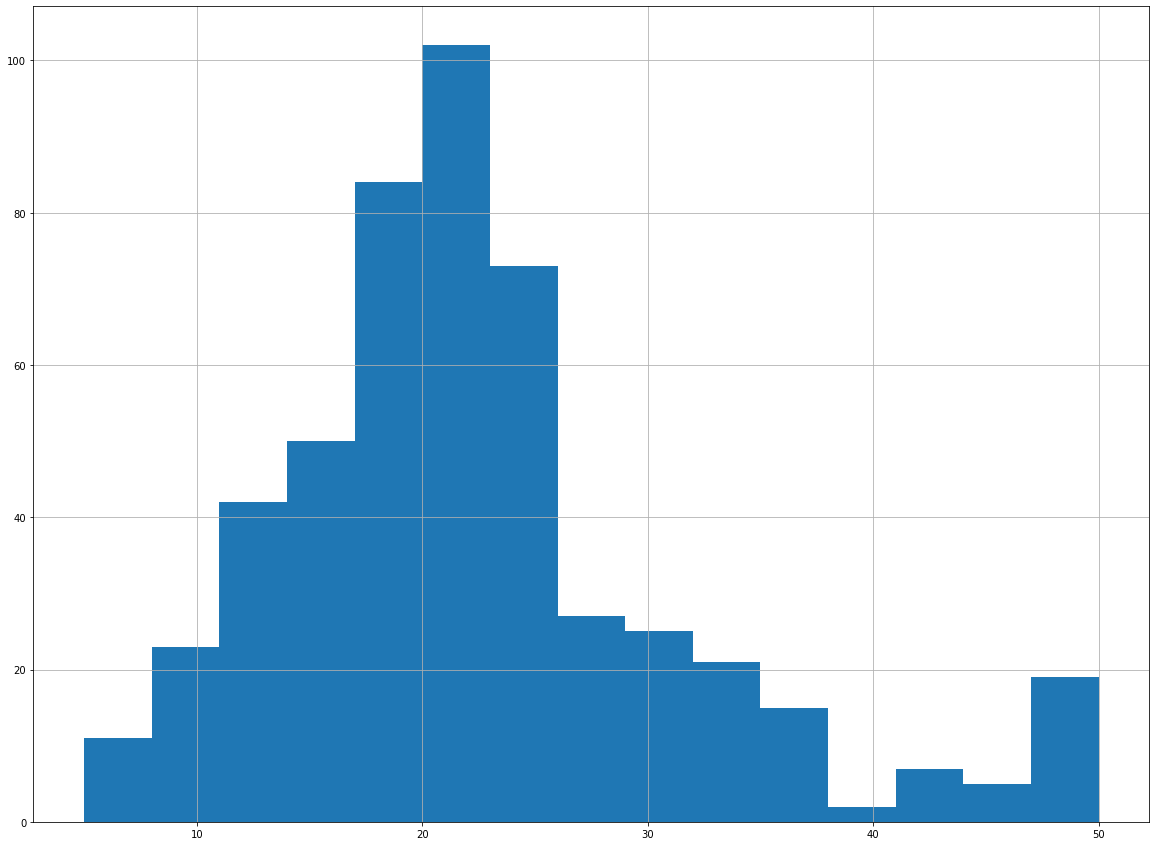

In [5]:
# Let's plot a histogram of the target variable "medv" (column MEDV)

"""
A histogram is a visual representation of the distribution of a dataset.
Histogram is similar to bar chat but the difference is it groups the values into continuous ranges. 
Each bar in histogram represents the height of the number of values present in that range.
"""

df['medv'].hist(bins=15, figsize=(20,15))

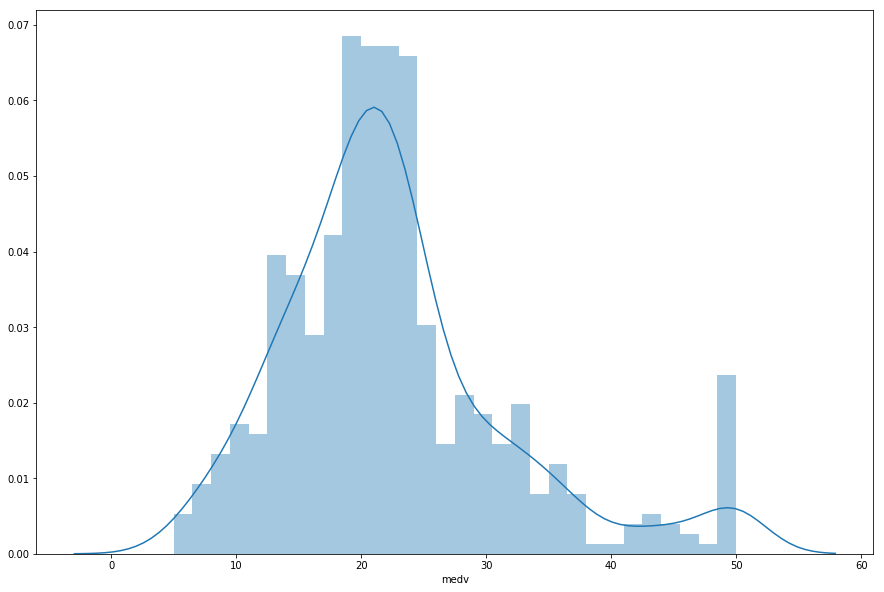

In [6]:
# Note how seaborn addition visualy improves our histogram 

"""
Seaborn Distplot represents the overall distribution of continuous data variables. 
"""

plt.figure(figsize = (15,10)) # matplotlib
sns.distplot(df['medv'], bins = 30) # seaborn 

### CORRELATION MATRIX & HEATMAP

- NB:  a correlation matrix can be computed only on quantitative variables (e.g. numbers, not categories).
- Correlation coefficients are used to measure the strength of the relationship between two variables.
- Values always range between -1 (strong negative relationship) and +1 (strong positive relationship). 

__EXAMPLE__

1. 'Level of poison in an animal' and 'skin colour of an animal' will be strongly corrlated, so the coefficient will be close to 1 (e.g. 0.75 etc.) We say they are positively correlated and are moving in the same direction: the brighter an animal, more poisinous it is. 


2. 'COVID Vaccination levels' and 'COVID cases' are strongly negatively correlated: when one goes up, the other one goes down.  (the correlation coefficient will be close to -1)


3. Corellation coefficient around 0 (zero) indicates no correlation between variables. 

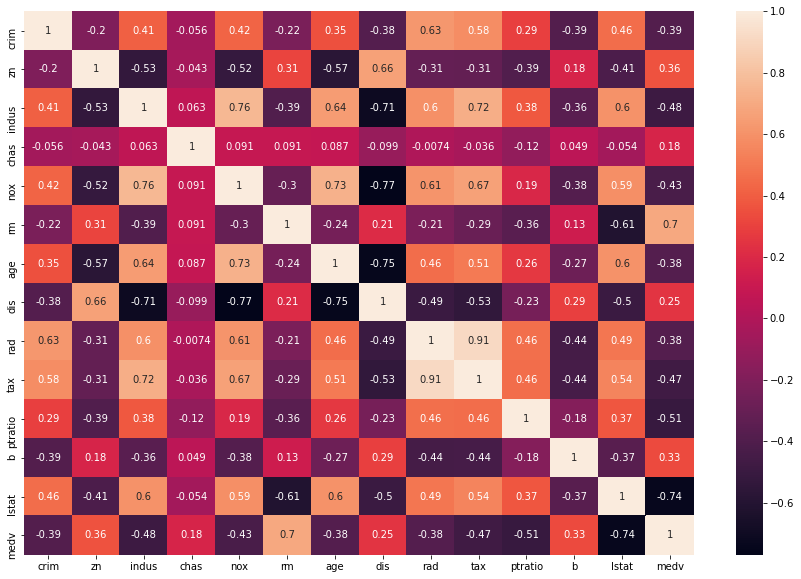

In [6]:
plt.figure(figsize = (15,10))
correlation_matrix = df.corr()

# seaborn adds heatmap to visually highlight significant values in the matrix
sns.heatmap(data = correlation_matrix, annot = True)

### DISCUSSION

- What are the variables (columns) in BHDA that our target variable MEDV is the most correlated to?
- Find most negative and most positive correlation for MEDV


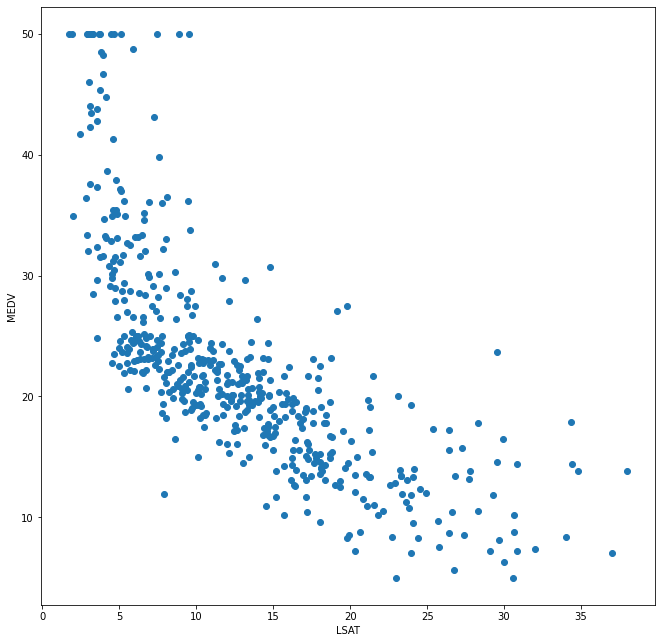

In [7]:
# Build a scatter plot to visualize the relationship between MEDV and LSTAT

plt.figure(figsize = (11,11))
plt.scatter(df['lstat'], df['medv'], marker='o')
plt.xlabel("LSAT")
plt.ylabel("MEDV")
plt.show()

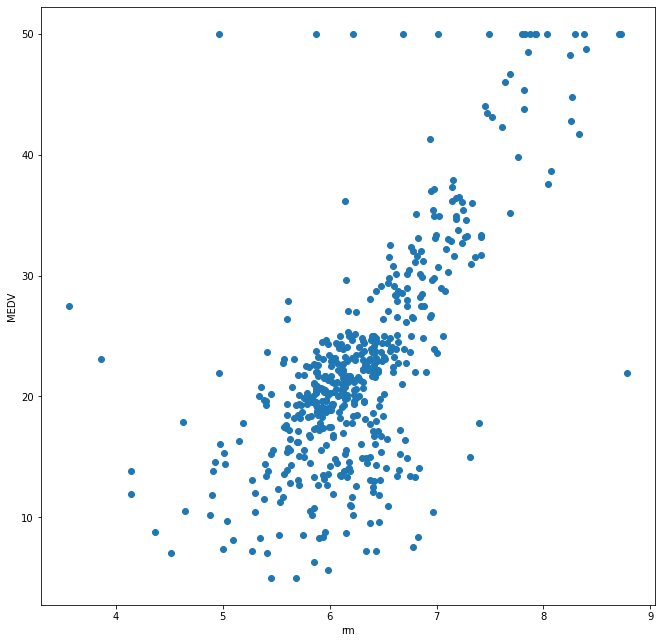

In [8]:
# Build a scatter plot to visualize the relationship between MEDV and RM

plt.figure(figsize = (11,11))
plt.scatter(df['rm'], df['medv'], marker='o')
plt.xlabel("rm")
plt.ylabel("MEDV")
plt.show()

## BUILD A MODEL

- __Let's build a predictive model based on these two features.__

- Important step: we need to keep some testing data that will be unknown to the model. 

- This will enable us to evaluate the performance of the model on new data. 

- We will train the model on 80% of the data and test it on the remaining 20%.

**Question: what potentially might happen if we train on 100% of the data?**

In [9]:
from sklearn.model_selection import train_test_split

X = df[['lstat', 'rm']] # our feature(s)
y = df['medv'] # our target variable

In [10]:
# splitting data into train and test parts

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [11]:
# Quick check to examine what we have got

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [14]:
"""
Let's now use scikit-learn to train our simple linear regression model. 

A linear regression model calculates an equation that minimizes the distance 
between the observed value and the predicted value.
"""


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) 


LinearRegression()



<div class="alert alert-block alert-warning">
<b>Testing models is an advanced topic and we are covering it as FYI only (not included in exams or tests)</b> 
</div>


## MODEL TESTING



 - We need to test our model on the remaining 20% of data. 
 - The metrics used to evaluate the performance of the model depend on the type of model you trained.
 - These metrics enable us to measure on our test data. 
 - The training data is unseen data for your model
 - Measuring our model on unseen training data gives us the error of our model compared to the reality.
 


__The most common metrics used to evaluate a regression model are :__

- The **Mean Absolute Error (MAE)** measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. The lower the MAE, the better your model is. 

<div class="alert alert-block alert-info">
$$\large{MAE = \frac{1}{n}\sum\nolimits_{i=1}^{n}{|y_i - \widehat{y}_i|}}$$
</div>


- The **Root Mean Square error** (RMSE) also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation. The lower the RMSE, the better your model is. 

<div class="alert alert-block alert-info">
$$\large{RMSE = \sqrt{\frac{1}{n}\sum\nolimits_{i=1}^{n}{(y_i - \widehat{y_i})^{2}}}}$$
</div>

- The **R-squared (R2)** is the percentage of the response variable variation that is explained by a linear model. It is always between 0 and 100%, and our aim is to maximise this measure - the closer to 100% is the R-squred, the more observed variation can the model explain.

<div class="alert alert-block alert-info">
$$\large{R^2 = \frac{Explained\ variation}{Total\ variation}}$$
</div>

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# model evaluation for testing set
y_pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('MAE score is {}'.format(mae))


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953
MAE score is 3.7913102133431034


## Adult Income dataset


<img src="data/images/adults.png" style="width:700px;">

- Let's use our previous dataset __Adults__
- This is the Classification example that we are faimilar with: predict if an adult's salary is <=50K or > 50K
- Interesting fact: this dataset was extracted from the 1994 Census database ¯\_(ツ)_/¯



## Adults Income Dataset (reminder)

- **age**: continuous.
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: continuous.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: continuous.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: continuous.
- **capital-loss**: continuous.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **income**: `>50K`, `<=50K`

__Classification:__ Prediction task is to determine whether a person makes over 50K a year.

## OUR OBJECITVES

- Last time we focused on pre-processing the pre-prepared training dataset 
- let's take a step back and start from scratch by:
    1. splitting out data into training and test datasets
    2. visualising features
    3. doing some modelling. 

In [17]:
# load data. Use adult.csv file (it is a larger raw file which we will split into training and test later)

df = pd.read_csv("data/adult.csv", sep = ",")

In [19]:
df.head(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [22]:

# getting an insight of our data

df.describe(include = 'all')

# NOTE lots of NaN values in the raw data (we will skip pre-processing this time)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [23]:
# note column 'income' (in the previous example we used added column 'target')
df['income'].value_counts()/len(df['income'])

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [24]:
categorical_features = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
continuous_features = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

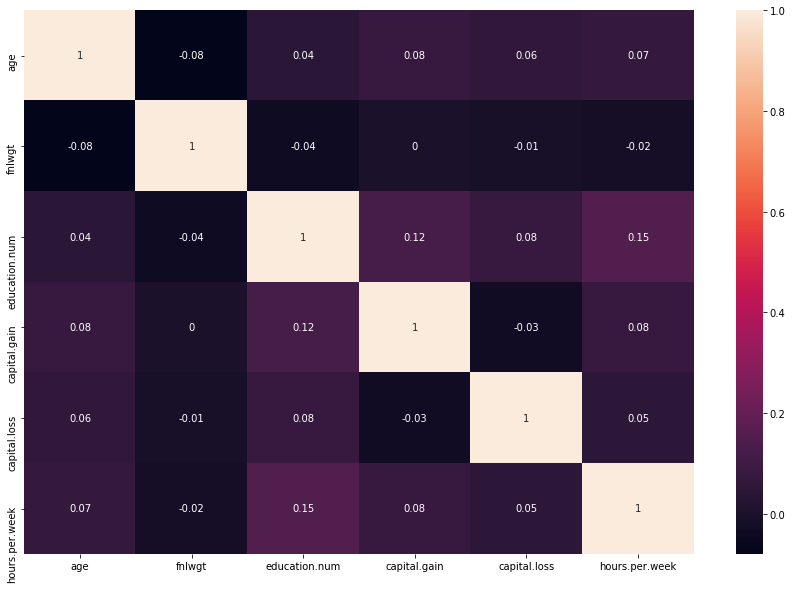

In [25]:
plt.figure(figsize = (15, 10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# DISCUSS: can we see any strong correlations? Why? 
# Do you notice anything interesting about this matrix?  (by default it can be done for numeric variables (columns) only :) 

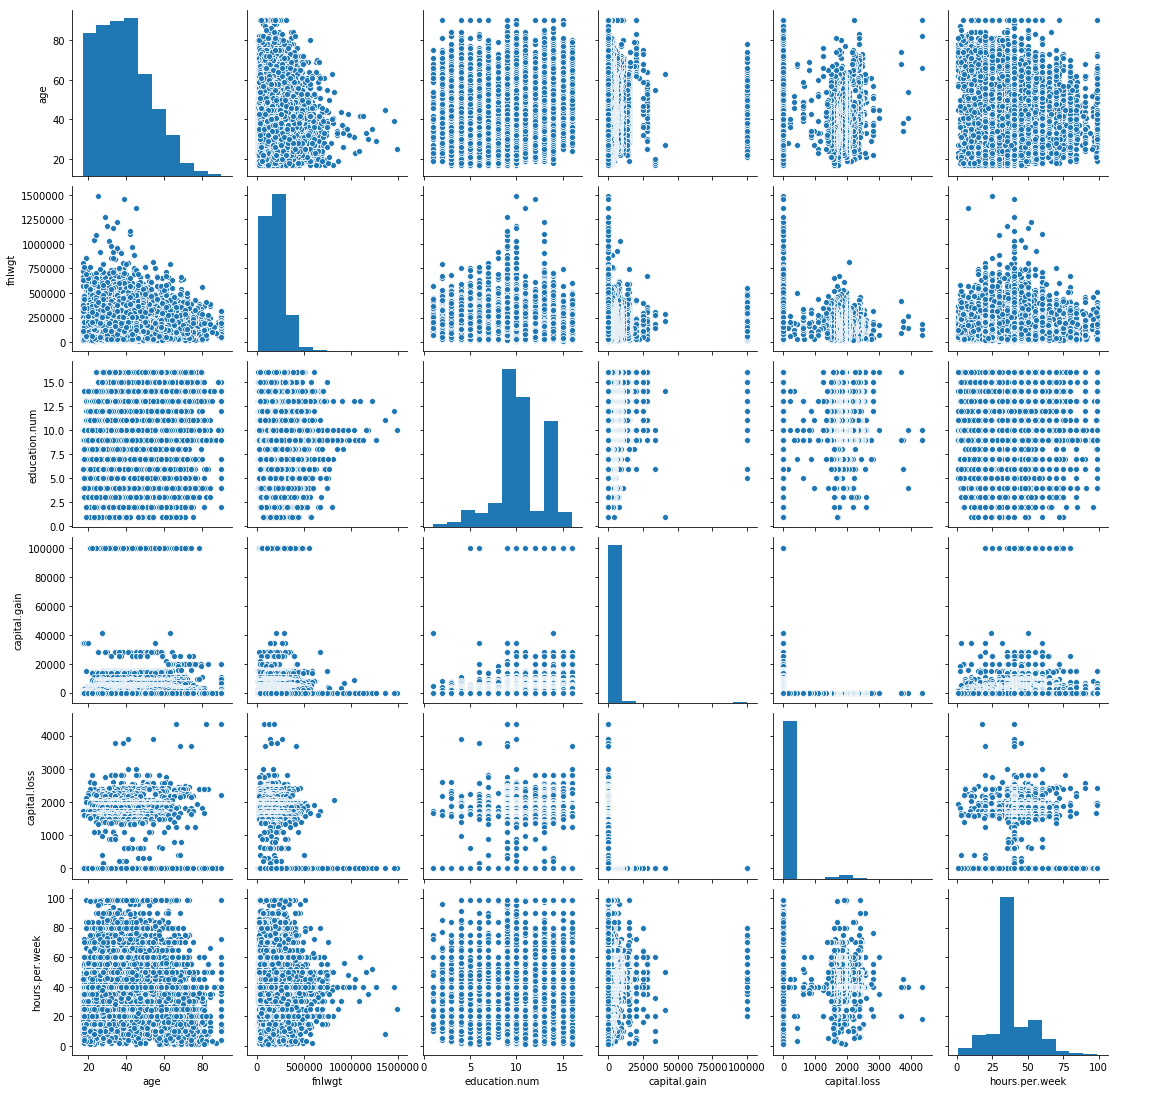

In [26]:
# seaborn pairplot gives us a matrix of paired and plotted features 
# The default pairs plot in seaborn only plots numerical columns (let's leave it like that for now) 

sns.pairplot(df)

## CATEGORICAL FEATURES

A good means to obtain insights about a categorical feature is to visualize its distribution with a **violin plot**. 

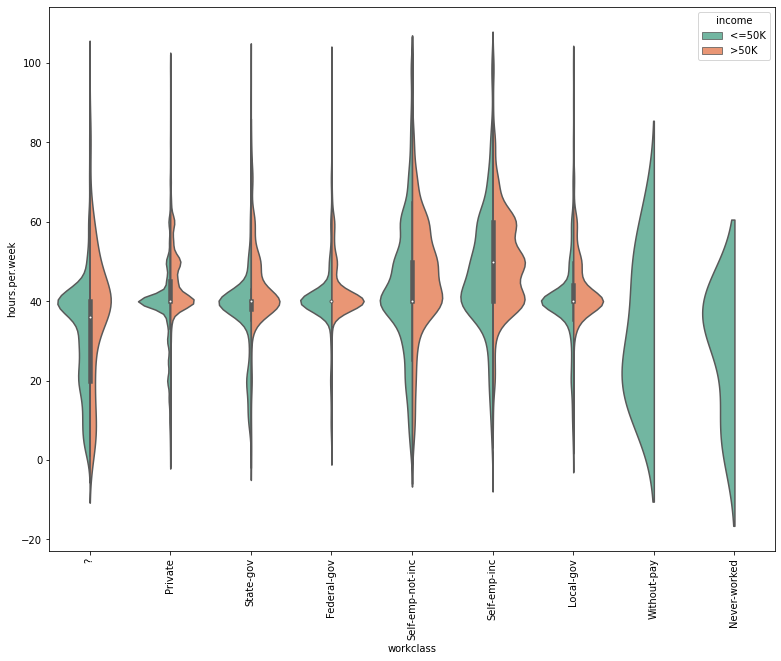

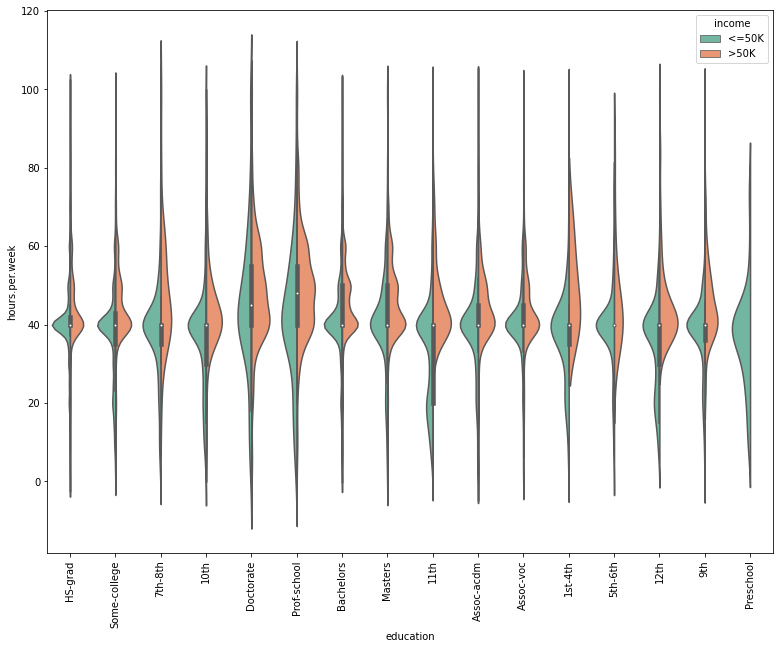

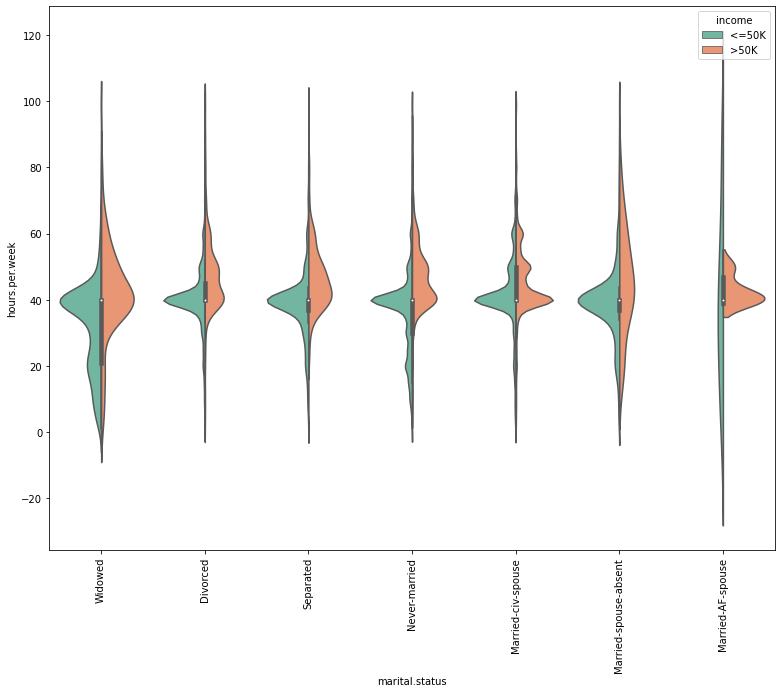

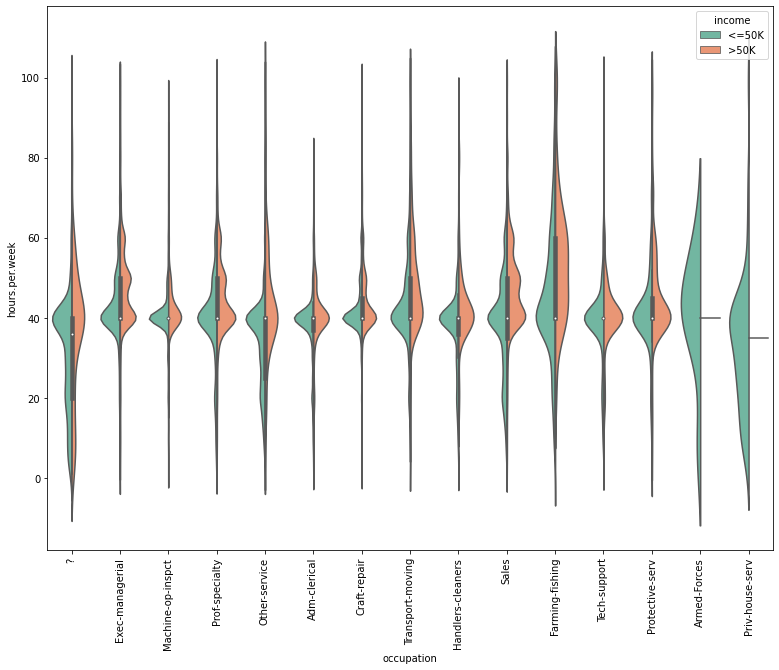

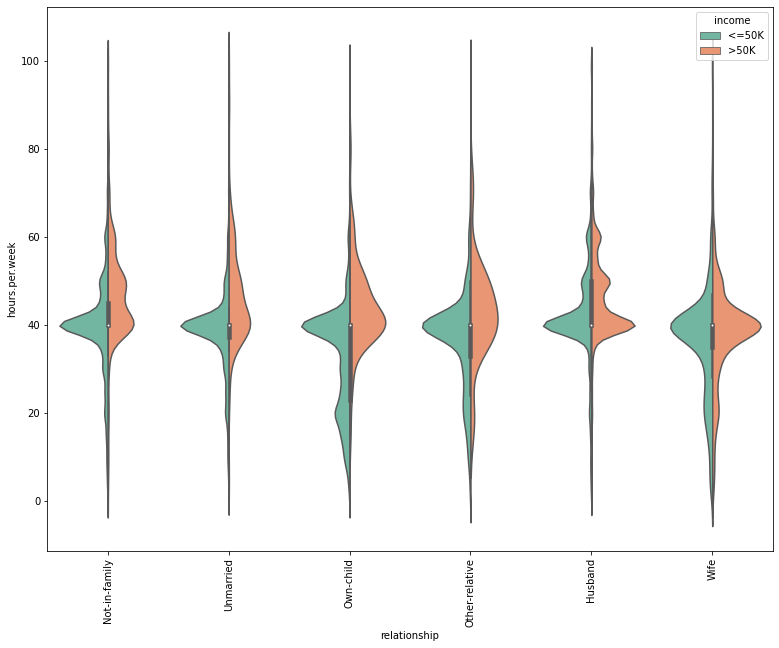

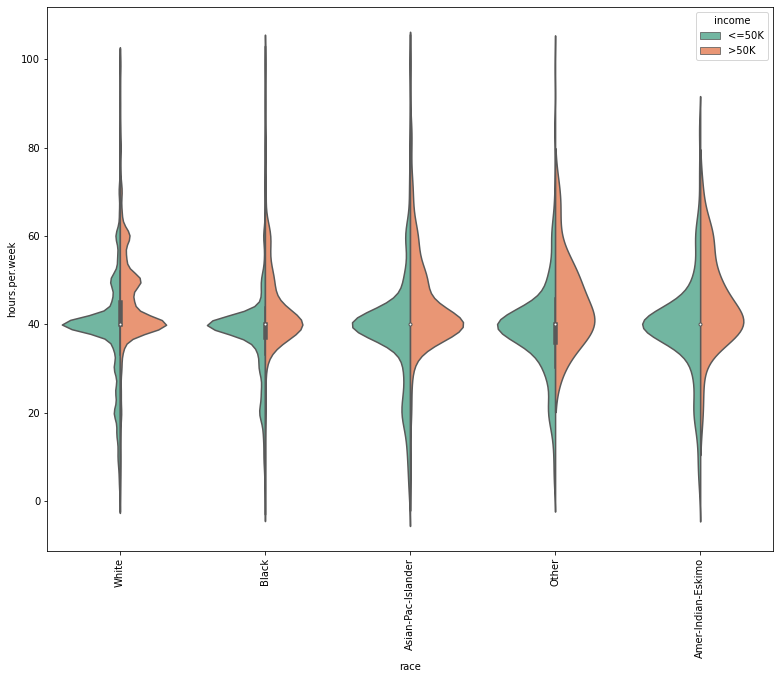

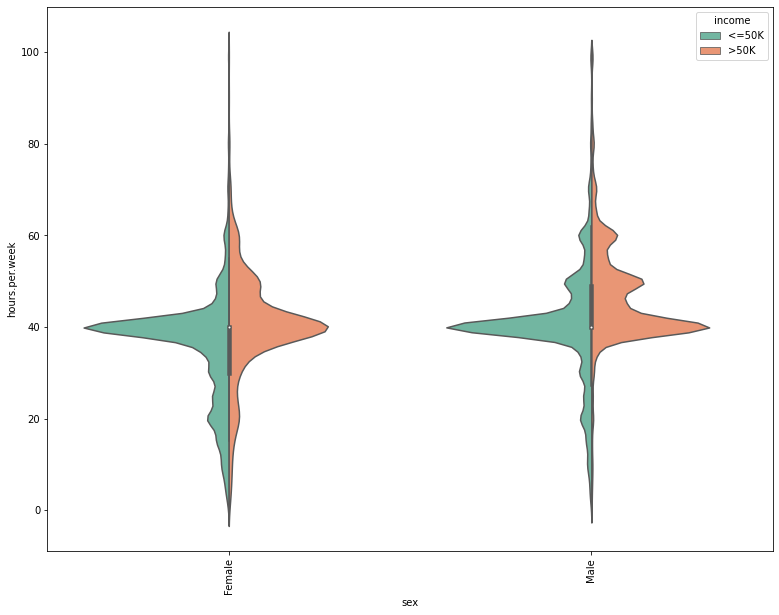

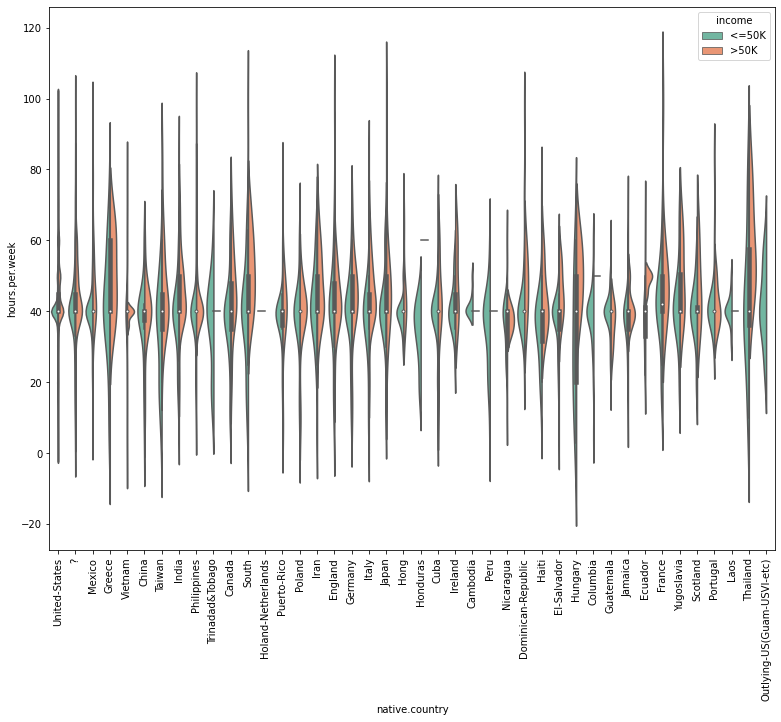

In [25]:
for feature in categorical_features:
    plt.figure(figsize = (13,10))
    ax = sns.violinplot(x=feature, y="hours.per.week", hue="income",
                        data=df, palette="Set2", split=True)
    plt.xticks(rotation=90)
    
# REVIEW PRODUCED PLOTS 
# Are they more meaningful?

## Modelling

- Let's try to do some modelling with our dataset
- Our target variable 'income' is a categorical feature with two categories.
- Before fitting a model to the data, we need to convert it to a number.

In [26]:
df.loc[df['income'] == '<=50K', 'income'] = 0
df.loc[df['income'] == '>50K', 'income'] = 1

In [27]:
df['income'] = df['income'].astype(int)

## IMPORTANT

- For almost all classification models, we  need to **one-hot encode** the categorical variables (remember previously we said that we can only pass in numeric values to SciKit). 

<div class="alert alert-block alert-info">
One-hot encoding converts each categorical value into a new column and assigns a 1 or 0 (True/False) value to each row.
</div>

 - __Advantage:__ "neutral" representation of the data (does not assign an order)
 - __Disadvantage:__ can **significantly increase** the number of columns in the dataset

In [28]:
# here is another way to do encoding
df = pd.get_dummies(df, columns = categorical_features)

In [29]:
# Splitting our data to TRAIN and TEST 

X = df.drop('income', axis = 1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)


### Training the logistic regression 


<div class="alert alert-block alert-info">
<b>It is a predictive algorithm using independent variables to predict the dependent variable, just like Linear Regression, but with a difference that the dependent variable should be categorical variable.</b>
</div>




In [30]:
X_train.shape

(26048, 108)

In [31]:
from sklearn.linear_model import LogisticRegression

# Let's compute the logistic regression
# Initiate your logistic model
logit = LogisticRegression(penalty='l2', tol=0.0001, C=1.0)
# Fit your logistic regression model to your train model
logit.fit(X_train, y_train)

LogisticRegression()

In [33]:
"""
The output of a logistic regression with the function predict_proba 
is a probability for each class 0 or 1. 

You can also use directly the function predict that returns the predicted class 
associated with the probability with a default threshold of 0.5.
"""

# Predict labels on your Test set of independent variables
pred_logit = logit.predict(X_test)
# Predict probabilities on your Test set of independent variables
proba_logit = logit.predict_proba(X_test)

In [34]:
pred_logit

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
proba_logit

array([[0.73003248, 0.26996752],
       [0.86041471, 0.13958529],
       [0.81335532, 0.18664468],
       ...,
       [0.76107505, 0.23892495],
       [0.77497854, 0.22502146],
       [0.76458215, 0.23541785]])

## DATASET FEATURES

- With the coefficients of the logistic regression, we can visualize the importance of each feature in our model with a barplot. 
- This is a good means to add some value to your analysis and interpret your model.

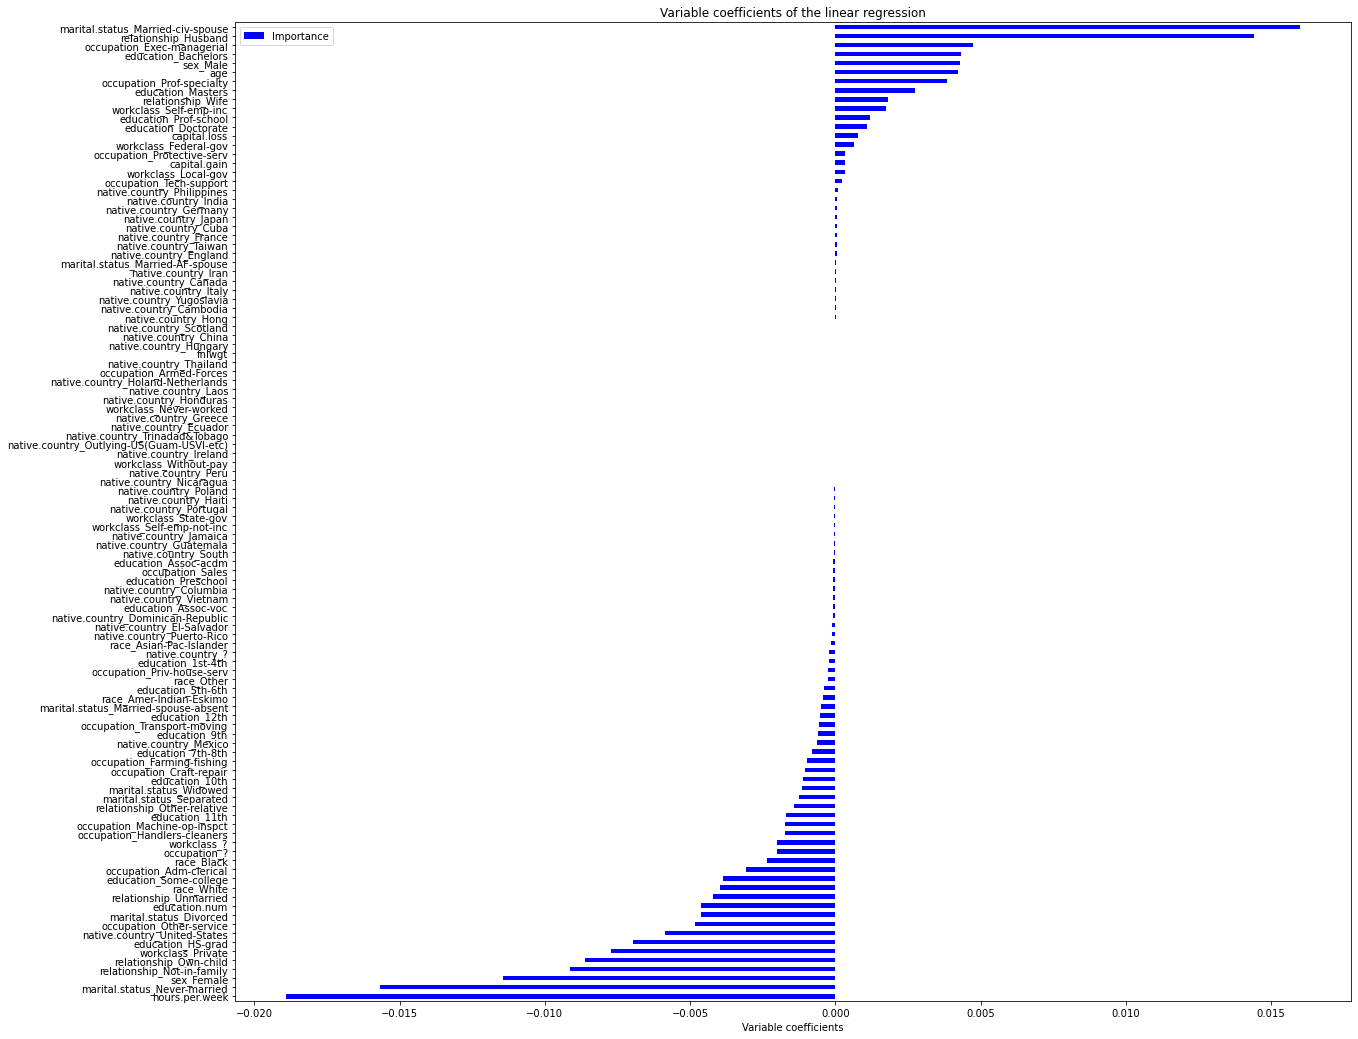

In [36]:
# Plot feature importance
coefs = pd.DataFrame(logit.coef_.reshape((108, 1)), 
                         index = X_train.columns.tolist(), columns = ['Importance'])
coefs = coefs.sort_values(by='Importance', ascending=True)
coefs.plot(kind='barh', figsize=(20,18), color = 'blue')
plt.xlabel('Variable coefficients')
plt.title('Variable coefficients of the linear regression')
plt.show()

### CLOSING REMARKS

1. ML is a truly complex and fascinating topic!
1. Our objective was to gain a high-level undertsanding of how the world of ML works. 
1. Now we understand the key ML terminology and we do not panic when we hear the expression 'supervised learning'. 
1. At this stage, use ML preprocessing analysis and visualization techniques to your advantage in your own research.
1. Remmeber that ML is a HUUUUGE topic, it is kind of impossible to know everything, but we made a good start :) 

<img src="data/images/remarks.jpeg" style="width:200px;" />